In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

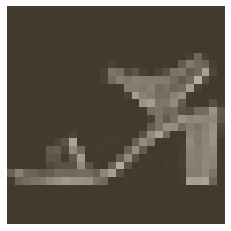

In [2]:
# sample image
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


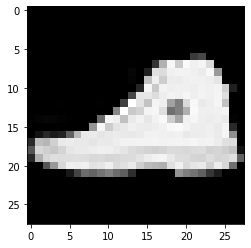

In [3]:
import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [4]:
# architecture 
inputs = images.view(images.shape[0], -1)
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3
        x = self.relu(x)
        x = nn.LogSoftmax(self.output(x))
        
        return x

In [13]:
# model definition
from torch import optim
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,10))

criterion = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.001)


In [14]:
# training 
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        opt.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        opt.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.279308148538634
Training loss: 2.195905753290221
Training loss: 1.9660919681032583
Training loss: 1.6040479068054574
Training loss: 1.2713560275177458


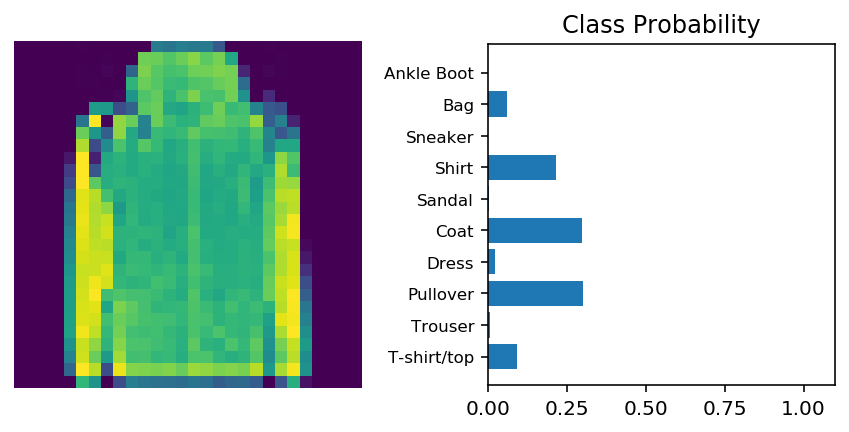

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# test out the network 

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# convert 2D image to 1D vector
img = img.resize_(1, 784)

# class probabilities (softmax) for img
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

ps = softmax(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [15]:
# thank you! 